https://www.kaggle.com/competitions/titanic/data

# 1. Import Statements

In [112]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 2. Data Exploration

In [113]:
df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
df.shape

(891, 12)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [119]:
df.groupby(by=['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [120]:
df.groupby(by=['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [121]:
df.groupby(by=['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [122]:
df.groupby(by=['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### Add family size column

In [123]:
df['Family_Size'] = df['SibSp'] + df['Parch']
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [124]:
df.groupby(by=['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


### Groupin family size to Alone, Small, Medium, Large

In [125]:
family_map = {0: 'Alone', 1: 'Small', 2: 'Small', 3: 'Small', 4: 'Medium', 5: 'Medium', 6: 'Large', 7: 'Large', 10: 'Large'}
df['Family_Size_Grouped'] = df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Alone


In [126]:
df.groupby(by=['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [127]:
df.groupby(by=['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


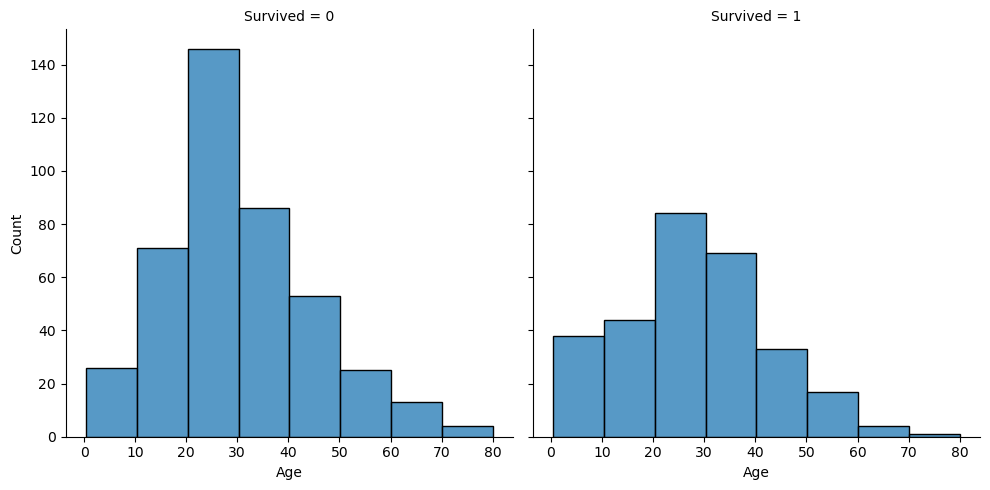

In [128]:
sns.displot(df, x='Age', col='Survived', binwidth=10)

### Changing age to age group: 0-16, 17-20, 21-24, 25-28, 29-32, 33-38, 39-47, 48-80

In [129]:
df['Age_Cut'] = pd.qcut(df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Alone,"(32.312, 38.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Alone,"(24.0, 28.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Alone,"(16.0, 20.125]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,Small,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Alone,"(24.0, 28.0]"


In [130]:
df.groupby(by=['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\matus\AppData\Local\Temp\ipykernel_8752\2606785770.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [131]:
bins = [0, 16, 20.125, 24, 28, 32.312, 38, 47, 80]
labels = [0, 1, 2, 3, 4, 5, 6, 7]

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,NaN,S,1,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,71.2833,C85,C,1,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,53.1000,C123,S,1,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8.0500,NaN,S,0,Alone,"(32.312, 38.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,13.0000,NaN,S,0,Alone,"(24.0, 28.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S,0,Alone,"(16.0, 20.125]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,Small,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,30.0000,C148,C,0,Alone,"(24.0, 28.0]"


In [132]:
test_df['Age'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=True)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,892,3,"Kelly, Mr. James",male,5,0,0,330911,7.8292,NaN,Q,0,Alone,"(32.0, 39.0]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6,1,0,363272,7.0000,NaN,S,1,Small,"(39.0, 48.0]"
2,894,2,"Myles, Mr. Thomas Francis",male,7,0,0,240276,9.6875,NaN,Q,0,Alone,"(48.0, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,3,0,0,315154,8.6625,NaN,S,0,Alone,"(24.0, 27.0]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2,1,1,3101298,12.2875,NaN,S,2,Small,"(21.0, 24.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,Alone,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,6,0,0,PC 17758,108.9000,C105,C,0,Alone,"(32.0, 39.0]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,6,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Alone,"(32.0, 39.0]"
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,Alone,NaN


### Chaning Fare to groups like age

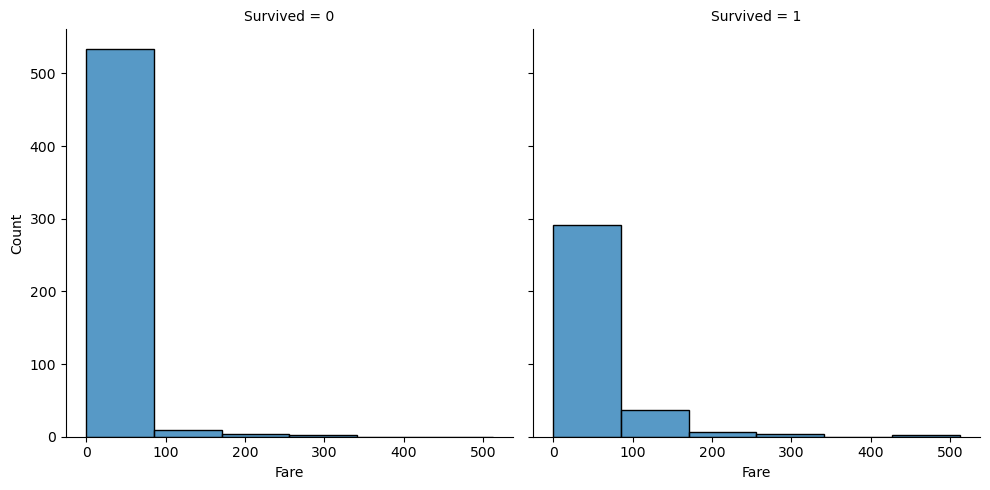

In [133]:
sns.displot(df, x='Fare', col='Survived', binwidth=80)

In [134]:
df['Fare_Cut'] = pd.qcut(df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [135]:
df.groupby(by=['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\matus\AppData\Local\Temp\ipykernel_8752\914245463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [136]:
bins = [0, 7.775, 8.622, 14.454, 26, 52.369, 512.329]
labels = [0, 1, 2, 3, 4, 5]

df['Fare'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=True)
test_df['Fare'] = pd.cut(test_df['Fare'], bins=bins, labels=labels, right=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,1,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C85,C,1,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,S,0,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,1,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,NaN,S,0,Alone,"(32.312, 38.0]","(7.775, 8.662]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,NaN,S,0,Alone,"(24.0, 28.0]","(8.662, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B42,S,0,Alone,"(16.0, 20.125]","(26.0, 52.369]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3,NaN,S,3,Small,NaN,"(14.454, 26.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C148,C,0,Alone,"(24.0, 28.0]","(26.0, 52.369]"


### Excluding title from name

In [137]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [138]:
df['Title'] = df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].apply(lambda x: x.strip())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,1,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C85,C,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,S,0,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,NaN,S,0,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,NaN,S,0,Alone,"(24.0, 28.0]","(8.662, 14.454]",Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B42,S,0,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3,NaN,S,3,Small,NaN,"(14.454, 26.0]",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C148,C,0,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr


In [139]:
df.groupby(by=['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [140]:
df['Title'] = df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
})

In [141]:
test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
})

In [142]:
df.groupby(by=['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [143]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,1,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C85,C,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,S,0,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,NaN,S,0,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,NaN,S,0,Alone,"(24.0, 28.0]","(8.662, 14.454]",Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B42,S,0,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3,NaN,S,3,Small,NaN,"(14.454, 26.0]",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C148,C,0,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr


### Extracting ticket parts into Ticket_Prefix and Ticket_Number

In [144]:
def extract_ticket_parts(ticket):
    match = re.match(r'(.* )?([0-9]+)', ticket)
    if match:
        return match.group(1).strip() if match.group(1) else 0, match.group(2)
    return None, None

In [145]:
df[['Ticket_Prefix', 'Ticket_Number']] = df['Ticket'].apply(lambda x: pd.Series(extract_ticket_parts(x)))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Ticket_Prefix,Ticket_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,1,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C85,C,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,S,0,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,NaN,S,0,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,NaN,S,0,Alone,"(24.0, 28.0]","(8.662, 14.454]",Rev,0,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B42,S,0,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss,0,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3,NaN,S,3,Small,NaN,"(14.454, 26.0]",Miss,W./C.,6607
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C148,C,0,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr,0,111369


In [146]:
df['Ticket_Prefix'].value_counts()

Ticket_Prefix
0              661
PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
CA.              8
SOTON/O.Q.       8
A/5.             7
SOTON/OQ         7
STON/O2.         6
CA               6
F.C.C.           5
C                5
SC/PARIS         5
S.O.C.           5
SC/Paris         4
A/4.             3
S.O./P.P.        3
PP               3
A/4              3
A.5.             2
S.C./PARIS       2
SOTON/O2         2
P/PP             2
SC/AH            2
WE/P             2
A./5.            2
SC/AH Basle      1
SO/C             1
S.W./PP          1
F.C.             1
A/S              1
SW/PP            1
SC               1
SCO/W            1
W/C              1
Fa               1
S.O.P.           1
S.C./A.4.        1
A4.              1
S.P.             1
W.E.P.           1
C.A./SOTON       1
Name: count, dtype: int64

In [147]:
test_df[['Ticket_Prefix', 'Ticket_Number']] = test_df['Ticket'].apply(lambda x: pd.Series(extract_ticket_parts(x)))
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Ticket_Prefix,Ticket_Number
0,892,3,"Kelly, Mr. James",male,5,0,0,330911,1,NaN,Q,0,Alone,"(32.0, 39.0]","(7.758, 8.662]",Mr,0,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6,1,0,363272,0,NaN,S,1,Small,"(39.0, 48.0]","(-0.001, 7.758]",Mrs,0,363272
2,894,2,"Myles, Mr. Thomas Francis",male,7,0,0,240276,2,NaN,Q,0,Alone,"(48.0, 76.0]","(8.662, 14.454]",Mr,0,240276
3,895,3,"Wirz, Mr. Albert",male,3,0,0,315154,2,NaN,S,0,Alone,"(24.0, 27.0]","(7.758, 8.662]",Mr,0,315154
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2,1,1,3101298,2,NaN,S,2,Small,"(21.0, 24.0]","(8.662, 14.454]",Mrs,0,3101298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,1,NaN,S,0,Alone,NaN,"(7.758, 8.662]",Mr,A.5.,3236
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,6,0,0,PC 17758,5,C105,C,0,Alone,"(32.0, 39.0]","(56.144, 512.329]",Dona,PC,17758
415,1307,3,"Saether, Mr. Simon Sivertsen",male,6,0,0,SOTON/O.Q. 3101262,0,NaN,S,0,Alone,"(32.0, 39.0]","(-0.001, 7.758]",Mr,SOTON/O.Q.,3101262
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,1,NaN,S,0,Alone,NaN,"(7.758, 8.662]",Mr,0,359309


In [148]:
df[df['Name'].str.contains('Jensen')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Ticket_Prefix,Ticket_Number
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,1,1,0,350046,1,NaN,S,1,Small,"(16.0, 20.125]","(7.775, 8.662]",Miss,0,350046
640,641,0,3,"Jensen, Mr. Hans Peder",male,1,0,0,350050,1,NaN,S,0,Alone,"(16.0, 20.125]","(7.775, 8.662]",Mr,0,350050
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,1,1,0,350048,0,NaN,S,1,Small,"(16.0, 20.125]","(-0.001, 7.775]",Mr,0,350048
771,772,0,3,"Jensen, Mr. Niels Peder",male,7,0,0,350047,1,NaN,S,0,Alone,"(47.0, 80.0]","(7.775, 8.662]",Mr,0,350047


In [149]:
df['Ticket_Number'].value_counts()

Ticket_Number
1601       7
347082     7
2343       7
3101295    6
2144       6
          ..
9234       1
19988      1
2693       1
17612      1
370376     1
Name: count, Length: 678, dtype: int64

In [150]:
# Ticket no. 1601 - Chinese seamen en route to Cuba for work

df[df['Ticket_Number'] == '2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Ticket_Prefix,Ticket_Number
59,60,0,3,"Goodwin, Master. William Frederick",male,0,5,2,CA 2144,4,NaN,S,7,Large,"(0.419, 16.0]","(26.0, 52.369]",Master,CA,2144
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,0,5,2,CA 2144,4,NaN,S,7,Large,"(0.419, 16.0]","(26.0, 52.369]",Miss,CA,2144
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,0,5,2,CA 2144,4,NaN,S,7,Large,"(0.419, 16.0]","(26.0, 52.369]",Master,CA,2144
480,481,0,3,"Goodwin, Master. Harold Victor",male,0,5,2,CA 2144,4,NaN,S,7,Large,"(0.419, 16.0]","(26.0, 52.369]",Master,CA,2144
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,6,1,6,CA 2144,4,NaN,S,7,Large,"(38.0, 47.0]","(26.0, 52.369]",Mrs,CA,2144
683,684,0,3,"Goodwin, Mr. Charles Edward",male,0,5,2,CA 2144,4,NaN,S,7,Large,"(0.419, 16.0]","(26.0, 52.369]",Mr,CA,2144


In [151]:
df['Ticket_Number_Counts'] = df.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_df['Ticket_Number_Counts'] = test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [152]:
df.groupby(['Ticket_Number_Counts'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False)

,Ticket_Number_Counts,count,mean
0,1.0,544,0.295956
1,2.0,188,0.569149
2,3.0,66,0.712121
3,4.0,40,0.525000
6,7.0,21,0.238095
5,6.0,18,0.000000
4,5.0,10,0.000000


In [153]:
df['Ticket_Prefix'].value_counts()

Ticket_Prefix
0              661
PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
CA.              8
SOTON/O.Q.       8
A/5.             7
SOTON/OQ         7
STON/O2.         6
CA               6
F.C.C.           5
C                5
SC/PARIS         5
S.O.C.           5
SC/Paris         4
A/4.             3
S.O./P.P.        3
PP               3
A/4              3
A.5.             2
S.C./PARIS       2
SOTON/O2         2
P/PP             2
SC/AH            2
WE/P             2
A./5.            2
SC/AH Basle      1
SO/C             1
S.W./PP          1
F.C.             1
A/S              1
SW/PP            1
SC               1
SCO/W            1
W/C              1
Fa               1
S.O.P.           1
S.C./A.4.        1
A4.              1
S.P.             1
W.E.P.           1
C.A./SOTON       1
Name: count, dtype: int64

### Cleanign ticket prefixes

In [154]:
tick_prefix_train = []
for i in range(0, len(df['Ticket_Prefix'])):
    match = re.search('^[a-zA-Z]+', str(df.iloc[i,17]))
    if (match):
        tick_prefix_train.append(match.group())
    else:
        tick_prefix_train.append(0)
    
tick_prefix_test = []
for i in range(0, len(test_df['Ticket_Prefix'])):
    match = re.search('^[a-zA-Z]+', str(test_df.iloc[i,17]))
    if (match):
        tick_prefix_test.append(match.group())
    else:
        tick_prefix_test.append(0)

In [155]:
df['Ticket_Prefix'] = tick_prefix_train
test_df['Ticket_Prefix'] = tick_prefix_test
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Ticket_Prefix,Ticket_Number,Ticket_Number_Counts
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,1,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,A,21171,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C85,C,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,PC,17599,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,S,0,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,STON,3101282,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,0,113803,2.0
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,NaN,S,0,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,0,373450,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,NaN,S,0,Alone,"(24.0, 28.0]","(8.662, 14.454]",Rev,0,211536,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B42,S,0,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss,0,112053,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3,NaN,S,3,Small,NaN,"(14.454, 26.0]",Miss,W,6607,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C148,C,0,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr,0,111369,1.0


In [156]:
df['Ticket_Prefix'].value_counts()

Ticket_Prefix
0        661
PC        60
C         33
A         29
STON      18
SOTON     17
S         14
CA        14
SC        13
W         11
F          6
None       4
PP         3
P          2
WE         2
SW         1
SCO        1
Fa         1
SO         1
Name: count, dtype: int64

### Extracting cabin letter from cabin number and cleaning missing values by adding 'U' - unassigned

In [157]:
def extract_cabin_letters(cabin):
    if pd.isna(cabin):
        return 'U'
    match = re.match(r'([a-zA-Z]+)', cabin)
    return match.group(1) if match else None

In [158]:
df['Cabin'] = df['Cabin'].apply(extract_cabin_letters)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Ticket_Prefix,Ticket_Number,Ticket_Number_Counts
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,U,S,1,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,A,21171,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C,C,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,PC,17599,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,U,S,0,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,STON,3101282,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C,S,1,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,0,113803,2.0
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,U,S,0,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,0,373450,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,U,S,0,Alone,"(24.0, 28.0]","(8.662, 14.454]",Rev,0,211536,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B,S,0,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss,0,112053,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3,U,S,3,Small,NaN,"(14.454, 26.0]",Miss,W,6607,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C,C,0,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr,0,111369,1.0


In [159]:
df['Cabin'].value_counts()

Cabin
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [160]:
df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [161]:
test_df['Cabin'] = test_df['Cabin'].apply(extract_cabin_letters)

### Change age and fare collumns to numeric

In [162]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
test_df['Fare'] = pd.to_numeric(test_df['Fare'], errors='coerce')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   714 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  873 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  Family_Size           891 non-null    int64   
 13  Family_Size_Grouped   891 non-null    object  
 14  Age_Cut               714 non-null    category
 15  Fare_C

In [164]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           418 non-null    int64   
 1   Pclass                418 non-null    int64   
 2   Name                  418 non-null    object  
 3   Sex                   418 non-null    object  
 4   Age                   332 non-null    float64 
 5   SibSp                 418 non-null    int64   
 6   Parch                 418 non-null    int64   
 7   Ticket                418 non-null    object  
 8   Fare                  414 non-null    float64 
 9   Cabin                 418 non-null    object  
 10  Embarked              418 non-null    object  
 11  Family_Size           418 non-null    int64   
 12  Family_Size_Grouped   418 non-null    object  
 13  Age_Cut               332 non-null    category
 14  Fare_Cut              417 non-null    category
 15  Title 

### filling na values

In [165]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\matus\AppData\Local\Temp\ipykernel_8752\3260834260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\matus\AppData\Local\Temp\ipykernel_8752\3260834260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   891 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  Family_Size           891 non-null    int64   
 13  Family_Size_Grouped   891 non-null    object  
 14  Age_Cut               714 non-null    category
 15  Fare_C

In [167]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           418 non-null    int64   
 1   Pclass                418 non-null    int64   
 2   Name                  418 non-null    object  
 3   Sex                   418 non-null    object  
 4   Age                   418 non-null    float64 
 5   SibSp                 418 non-null    int64   
 6   Parch                 418 non-null    int64   
 7   Ticket                418 non-null    object  
 8   Fare                  418 non-null    float64 
 9   Cabin                 418 non-null    object  
 10  Embarked              418 non-null    object  
 11  Family_Size           418 non-null    int64   
 12  Family_Size_Grouped   418 non-null    object  
 13  Age_Cut               332 non-null    category
 14  Fare_Cut              417 non-null    category
 15  Title 

In [168]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Ticket_Prefix',
       'Ticket_Number', 'Ticket_Number_Counts'],
      dtype='object')

In [169]:
df = df.drop(['Age_Cut', 'Fare_Cut'], axis=1)

In [170]:
df['Ticket_Prefix'] = df['Ticket_Prefix'].astype(str)

# 3. Preparing data

In [171]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
si = SimpleImputer(strategy='most_frequent')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Pclass                891 non-null    int64  
 3   Name                  891 non-null    object 
 4   Sex                   891 non-null    object 
 5   Age                   891 non-null    float64
 6   SibSp                 891 non-null    int64  
 7   Parch                 891 non-null    int64  
 8   Ticket                891 non-null    object 
 9   Fare                  891 non-null    float64
 10  Cabin                 891 non-null    object 
 11  Embarked              889 non-null    object 
 12  Family_Size           891 non-null    int64  
 13  Family_Size_Grouped   891 non-null    object 
 14  Title                 891 non-null    object 
 15  Ticket_Prefix         8

In [173]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [204]:
df['Embarked'].fillna('S', inplace=True)


C:\Users\matus\AppData\Local\Temp\ipykernel_8752\399897443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [225]:
df['Ticket_Number_Counts'].fillna(1, inplace=True)

C:\Users\matus\AppData\Local\Temp\ipykernel_8752\2569205508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ticket_Number_Counts'].fillna(1, inplace=True)


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Pclass                891 non-null    int64  
 3   Name                  891 non-null    object 
 4   Sex                   891 non-null    object 
 5   Age                   891 non-null    float64
 6   SibSp                 891 non-null    int64  
 7   Parch                 891 non-null    int64  
 8   Ticket                891 non-null    object 
 9   Fare                  891 non-null    float64
 10  Cabin                 891 non-null    object 
 11  Embarked              891 non-null    object 
 12  Family_Size           891 non-null    int64  
 13  Family_Size_Grouped   891 non-null    object 
 14  Title                 891 non-null    object 
 15  Ticket_Prefix         8

In [227]:
ohe_cols = ['Sex', 'Embarked', 'Cabin', 'Title', 'Ticket_Prefix']
ode_cols = ['Family_Size_Grouped']

In [228]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Family_Size', 'SibSp', 'Parch', 'Ticket_Number'], axis=1)
y = df['Survived']

X_test = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Family_Size', 'Age_Cut', 'Fare_Cut', 'SibSp', 'Parch', 'Ticket_Number'], axis=1)

In [229]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [230]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [231]:
X_train

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Size_Grouped,Title,Ticket_Prefix,Ticket_Number_Counts
692,3,male,3.462185,5.000000,U,S,Alone,Mr,0,7.0
481,2,male,3.462185,2.533792,U,S,Alone,Mr,0,1.0
527,1,male,3.462185,5.000000,C,S,Alone,Mr,PC,1.0
855,3,female,1.000000,2.000000,U,S,Small,Mrs,0,1.0
801,2,female,4.000000,4.000000,U,S,Small,Mrs,C,3.0
...,...,...,...,...,...,...,...,...,...,...
359,3,female,3.462185,1.000000,U,Q,Alone,Miss,0,1.0
258,1,female,5.000000,2.533792,U,C,Alone,Miss,PC,3.0
736,3,female,7.000000,4.000000,U,S,Medium,Mrs,W,4.0
462,1,male,6.000000,4.000000,E,S,Alone,Mr,0,1.0


In [232]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass                712 non-null    int64  
 1   Sex                   712 non-null    object 
 2   Age                   712 non-null    float64
 3   Fare                  712 non-null    float64
 4   Cabin                 712 non-null    object 
 5   Embarked              712 non-null    object 
 6   Family_Size_Grouped   712 non-null    object 
 7   Title                 712 non-null    object 
 8   Ticket_Prefix         712 non-null    object 
 9   Ticket_Number_Counts  712 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 61.2+ KB


In [233]:
col_trans = ColumnTransformer(transformers=[
    ('impute', si, ['Age', 'Ticket_Number_Counts']),
    ('ode_pipeline', ode_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'Age', 'Fare', 'Ticket_Number_Counts'])
], n_jobs=1)

In [251]:
scores = []

# 4. Training models

### Random Forest Classifier

In [187]:
rfc = RandomForestClassifier()

rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=StratifiedKFold(n_splits=5))

pipeline_rfc = make_pipeline(col_trans, rfc_cv)

In [188]:
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age',
                                                   'Ticket_Number_Counts']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('oh...
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 10, 20],
                                          'max_features': ['sqrt', 'log2'],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 200, 300]}))])

In [235]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.8315079286910272


In [252]:
scores.append({'model': 'random_forest_classifier',
               'best_score': rfc_cv.best_score_,
               'best_params': rfc_cv.best_params_})

### Decision Tree Classifier

In [237]:
dtc = DecisionTreeClassifier()

In [238]:
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10], 
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [239]:
dtc_cv = GridSearchCV(dtc, param_grid=dtc_param_grid, cv=StratifiedKFold(n_splits=5))

In [240]:
pipeline_dtc = make_pipeline(col_trans, dtc_cv)

In [241]:
pipeline_dtc.fit(X_train, y_train)

c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3840 fits failed out of a total of 15360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age',
                                                   'Ticket_Number_Counts']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('oh...
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'class_weight': [None, 'balanced'],
                                          'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 10, 20, 30, 40,
                                                        50],
                                          'max_features': [None, 'auto', 'sqrt',
                                                           'log2'],
                                          'min_samples_leaf': [1, 2, 5, 10],
                                          'min_samples_split': [2, 5, 10, 20],
                                          'splitter': ['best', 'random']}))])

In [242]:
print(dtc_cv.best_params_)
print(dtc_cv.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.8216684723726978


In [253]:
scores.append({'model': 'decision_tree_classifier',
               'best_score': dtc_cv.best_score_,
               'best_params': dtc_cv.best_params_})

### Logistic Regression

In [244]:
lr = LogisticRegression()

lr_param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300, 400, 500]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [100, 200, 300, 400, 500]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 'max_iter': [100, 200, 300, 400, 500]},
]

lr_cv = GridSearchCV(lr, param_grid=lr_param_grid, cv=StratifiedKFold(n_splits=5))

pipeline_lr = make_pipeline(col_trans, lr_cv)
pipeline_lr.fit(X_train, y_train)

c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\matus\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\matus\anaconda3\

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age',
                                                   'Ticket_Number_Counts']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('oh...
                                           'max_iter': [100, 200, 300, 400,
                                                        500],
                                           'penalty': ['l1'],
                                           'solver': ['liblinear', 'saga']},
                                          {'C': [0.01, 0.1, 1, 10, 100],
                                           'max_iter': [100, 200, 300, 400,
                                                        500],
                                           'penalty': ['l2'],
                                           'solver': ['liblinear', 'lbfgs',
                                                      'newton-cg', 'sag',
                                                      'saga']},
                                          {'C': [0.01, 0.1, 1, 10, 100],
                                           'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                                           'max_iter': [100, 200, 300, 400,
                                                        500],
                                           'penalty': ['elasticnet'],
                                           'solver': ['saga']}]))])

In [245]:
print(lr_cv.best_params_)
print(lr_cv.best_score_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8118684132768639


In [254]:
scores.append({'model': 'logistic_regression',
               'best_score': lr_cv.best_score_,
               'best_params': lr_cv.best_params_})

### k-Nearest Neighgors Classifier

In [248]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

knn_cv = GridSearchCV(knn, param_grid=knn_param_grid, cv=StratifiedKFold(n_splits=5))

pipeline_knn = make_pipeline(col_trans, knn_cv)
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age',
                                                   'Ticket_Number_Counts']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('oh...
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'leaf_size': [10, 20, 30, 40, 50],
                                          'n_neighbors': [3, 5, 7, 9, 11, 13,
                                                          15, 17, 19, 21],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [249]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
0.8230670737712991


In [255]:
scores.append({'model': 'k_nearest_neighbors',
               'best_score': knn_cv.best_score_,
               'best_params': knn_cv.best_params_})

### Gaussian Naive Bayes Classifier

In [256]:
nb = GaussianNB()

nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

nb_cv = GridSearchCV(nb, param_grid=nb_param_grid, cv=StratifiedKFold(n_splits=5))

pipeline_nb = make_pipeline(col_trans, nb_cv)
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age',
                                                   'Ticket_Number_Counts']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('oh...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Title', 'Ticket_Prefix']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                            1e-06, 1e-05,
                                                            0.0001, 0.001]}))])

In [257]:
print(nb_cv.best_params_)
print(nb_cv.best_score_)

{'var_smoothing': 0.001}
0.7794937456909288


In [258]:
scores.append({'model': 'naive_bayes',
               'best_score': nb_cv.best_score_,
               'best_params': nb_cv.best_params_})

# 5. Making Predictions

In [259]:
scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
scores_df

,model,best_score,best_params
0,random_forest_classifier,0.831508,"{'criterion': 'entropy', 'max_depth': 10, 'max..."
1,decision_tree_classifier,0.821668,"{'class_weight': 'balanced', 'criterion': 'ent..."
2,logistic_regression,0.811868,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '..."
3,k_nearest_neighbors,0.823067,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n..."
4,naive_bayes,0.779494,{'var_smoothing': 0.001}


In [260]:
scores_df.to_csv('./scores.csv')

In [261]:
import pickle
with open('./model/model.pkl', 'wb') as f:
    pickle.dump(pipeline_rfc, f)

In [262]:
pred_rfc = pipeline_rfc.predict(test_df)
pred_dtc = pipeline_dtc.predict(test_df)
pred_lr = pipeline_lr.predict(test_df)
pred_knn = pipeline_knn.predict(test_df)
pred_nb = pipeline_nb.predict(test_df)

In [263]:
pred_rfc

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [266]:
y_true = pd.read_csv('./data/gender_submission.csv')
y_true.drop(['PassengerId'], axis=1, inplace=True)

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [270]:
y_true = y_true['Survived'].to_numpy()

In [274]:
from sklearn.metrics import accuracy_score

pred_acc_rfc = accuracy_score(y_true, pred_rfc)
pred_acc_dtc = accuracy_score(y_true, pred_dtc)
pred_acc_lr = accuracy_score(y_true, pred_lr)
pred_acc_knn = accuracy_score(y_true, pred_knn)
pred_acc_nb = accuracy_score(y_true, pred_nb)

In [275]:
print(f'Random Forest Classifier prediction score: {(pred_acc_rfc*100):.4f} %')
print(f'Decision Tree Classifier prediction score: {(pred_acc_dtc*100):.4f} %')
print(f'Logistic Regression prediction score: {(pred_acc_lr*100):.4f} %')
print(f'k-nearest neighbor prediction score: {(pred_acc_knn*100):.4f} %')
print(f'Naive Bayes prediction score: {(pred_acc_nb*100):.4f} %')

Random Forest Classifier prediction score: 95.6938 %
Decision Tree Classifier prediction score: 85.6459 %
Logistic Regression prediction score: 93.7799 %
k-nearest neighbor prediction score: 91.3876 %
Naive Bayes prediction score: 85.1675 %


Best model (Random Forest Classifier) scored 95.7% on test data